In [1]:
import os
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import glob
import cv2
from keras import layers
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.losses import mse
from keras import backend as K
from keras import models
from sklearn.svm import OneClassSVM

acc0_all = []
acc1_all = []
num = 150
param_nu = 2**(-5)
param_ga = 10**(-2)

Epoch 1/150
6/6 [==============================] - 34s 5s/step - loss: 0.6977 - val_loss: 0.6757
Epoch 2/150
6/6 [==============================] - 30s 5s/step - loss: 0.6481 - val_loss: 0.5848
Epoch 3/150
6/6 [==============================] - 30s 5s/step - loss: 0.5564 - val_loss: 0.5192
Epoch 4/150
6/6 [==============================] - 28s 5s/step - loss: 0.5074 - val_loss: 0.4866
Epoch 5/150
6/6 [==============================] - 28s 5s/step - loss: 0.4780 - val_loss: 0.4585
Epoch 6/150
6/6 [==============================] - 29s 5s/step - loss: 0.4461 - val_loss: 0.4262
Epoch 7/150
6/6 [==============================] - 28s 5s/step - loss: 0.4188 - val_loss: 0.4061
Epoch 8/150
6/6 [==============================] - 28s 5s/step - loss: 0.4041 - val_loss: 0.4074
Epoch 9/150
6/6 [==============================] - 28s 5s/step - loss: 0.4118 - val_loss: 0.4119
Epoch 10/150
6/6 [==============================] - 29s 5s/step - loss: 0.4044 - val_loss: 0.3849
Epoch 11/150
6/6 [===========

6/6 [==============================] - 31s 5s/step - loss: 0.3593 - val_loss: 0.3591
Epoch 85/150
6/6 [==============================] - 28s 5s/step - loss: 0.3594 - val_loss: 0.3590
Epoch 86/150
6/6 [==============================] - 28s 5s/step - loss: 0.3593 - val_loss: 0.3591
Epoch 87/150
6/6 [==============================] - 29s 5s/step - loss: 0.3593 - val_loss: 0.3591
Epoch 88/150
6/6 [==============================] - 29s 5s/step - loss: 0.3594 - val_loss: 0.3591
Epoch 89/150
6/6 [==============================] - 29s 5s/step - loss: 0.3593 - val_loss: 0.3590
Epoch 90/150
6/6 [==============================] - 29s 5s/step - loss: 0.3592 - val_loss: 0.3590
Epoch 91/150
6/6 [==============================] - 33s 6s/step - loss: 0.3592 - val_loss: 0.3590
Epoch 92/150
6/6 [==============================] - 28s 5s/step - loss: 0.3593 - val_loss: 0.3591
Epoch 93/150
6/6 [==============================] - 28s 5s/step - loss: 0.3594 - val_loss: 0.3589
Epoch 94/150
6/6 [===============

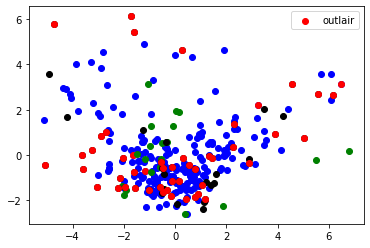

45 18
0 20
accuracy: 0.7831325301204819
Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.3605 - val_loss: 0.3593
Epoch 2/150
1/1 [==============================] - 4s 4s/step - loss: 0.3606 - val_loss: 0.3586
Epoch 3/150
1/1 [==============================] - 3s 3s/step - loss: 0.3599 - val_loss: 0.3586
Epoch 4/150
1/1 [==============================] - 4s 4s/step - loss: 0.3599 - val_loss: 0.3591
Epoch 5/150
1/1 [==============================] - 4s 4s/step - loss: 0.3603 - val_loss: 0.3588
Epoch 6/150
1/1 [==============================] - 4s 4s/step - loss: 0.3601 - val_loss: 0.3586
Epoch 7/150
1/1 [==============================] - 4s 4s/step - loss: 0.3599 - val_loss: 0.3587
Epoch 8/150
1/1 [==============================] - 4s 4s/step - loss: 0.3600 - val_loss: 0.3589
Epoch 9/150
1/1 [==============================] - 4s 4s/step - loss: 0.3602 - val_loss: 0.3588
Epoch 10/150
1/1 [==============================] - 4s 4s/step - loss: 0.3601 - val_loss: 0.3585

In [ ]:
%%time
for i in range(3):
    X_list = glob.glob('bottle/train/good/*.png')
    Y_list1 = glob.glob('bottle/test/broken_large/*.png')
    Y_list2 = glob.glob('bottle/test/broken_small/*.png')
    Y_list3 = glob.glob('bottle/test/contamination/*.png')
    Y_list4 = glob.glob('bottle/test/good/*.png')
    X_train = None
    X_test_good = None
    X_test_error = None
    for X_file in X_list:
      im = cv2.imread(X_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, (256,256))
      im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
      if X_train is not None:
        X_train = np.concatenate((X_train, im))
      if X_train is None:
        X_train = im

    for Y_file in Y_list1:
      im = cv2.imread(Y_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, (256,256))
      im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
      if X_test_error is not None:
        X_test_error = np.concatenate((X_test_error, im))
      if X_test_error is None:
        X_test_error = im

    for Y_file in Y_list2:
      im = cv2.imread(Y_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, (256,256))
      im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
      if X_test_error is not None:
        X_test_error = np.concatenate((X_test_error, im))
      if X_test_error is None:
        X_test_error = im

    for Y_file in Y_list3:
      im = cv2.imread(Y_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, (256,256))
      im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
      if X_test_error is not None:
        X_test_error = np.concatenate((X_test_error, im))
      if X_test_error is None:
        X_test_error = im

    for Y_file in Y_list4:
      im = cv2.imread(Y_file)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      im = cv2.resize(im, (256,256))
      im = im.reshape(1,im.shape[0],im.shape[1],im.shape[2])
      if X_test_good is not None:
        X_test_good = np.concatenate((X_test_good, im))
      if X_test_good is None:
        X_test_good = im

    X_train = X_train/255
    X_test_good = X_test_good/255
    X_test_error = X_test_error/255
    x_train, x_test = train_test_split(X_train, test_size=0.2)


    image_height, image_width = 256,256
    input_shape = (256,256, 3)

    model = models.Sequential()

    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same',input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(layers.Conv2D(8, kernel_size=(3, 3),activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))

    model.add(layers.Conv2D(16, kernel_size=(3, 3),activation='relu', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))

    model.add(layers.Conv2D(64, kernel_size=(3, 3),activation='sigmoid', padding='same'))
    model.add(layers.UpSampling2D(size=(2, 2)))

    model.add(layers.Conv2D(3, kernel_size=(3, 3),activation='sigmoid', padding='same'))
    model.compile(optimizer='adam',loss='binary_crossentropy')


    model.fit(x_train, x_train,epochs=num,batch_size=32,shuffle=True,validation_data=(x_test, x_test))
    score = model.evaluate(x_test, x_test, verbose=0)
    print('test xentropy:', score)

    encoder = models.clone_model(model)
    encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
    encoder.set_weights(model.get_weights())
    for i in range(7):
        encoder.pop()

    X_tr = encoder.predict(X_train,verbose=0)
    X_tg = encoder.predict(X_test_good,verbose=0)
    X_te = encoder.predict(X_test_error,verbose=0)
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))

    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(x_tr)
    f_train = pca.transform(x_tr)

    pca.fit(x_tg)
    f_test_0 = pca.transform(x_tg)

    pca.fit(x_te)
    f_test_1 = pca.transform(x_te)

    clf = OneClassSVM(nu=param_nu, kernel="rbf", gamma=param_ga)
    clf.fit(x_tr)
    pred_tr = clf.predict(x_tr)
    pred_tg = clf.predict(x_tg)
    pred_te = clf.predict(x_te)

    index_tr = np.where(pred_tr < 0)
    index_tg = np.where(pred_tg < 0)
    index_te = np.where(pred_te < 0)

    plt.scatter(f_train[:, 0], f_train[:, 1],c='b')
    plt.scatter(f_train[index_tr, 0], f_train[index_tr, 1], c='red', label='outlair')

    plt.scatter(f_test_0[:, 0], f_test_0[:, 1],c='g')
    plt.scatter(f_test_0[index_tg, 0], f_test_0[index_tg, 1], c='red')

    plt.scatter(f_test_1[:, 0], f_test_1[:, 1],c='black')
    plt.scatter(f_test_1[index_te, 0], f_test_1[index_te, 1], c='red')

    plt.legend()
    plt.savefig('OneClassSVM.png')
    plt.show()

    in_tg = np.array(index_tg)
    in_te = np.array(index_te)

    a0, b0 = in_tg.shape
    a1, b1 = in_te.shape

    TN = len(x_tg) - b0
    FP = b0
    FN = len(x_te) - b1
    TP = b1
    print(TP, FN)
    print(FP, TN)
    a = (TP + TN)/(TP+TN+FP+FN)
    acc0_all.append(a)
    print('accuracy:',a) 

    s_v = np.array(clf.support_)
    SV = []
    for i in range(len(s_v)):
        SV.append(list(X_train[s_v[i], :, :, :]))
    sv = np.array(SV)

    model.fit(sv, sv,epochs=num,batch_size=32,shuffle=True,validation_data=(x_test, x_test))
    score = model.evaluate(x_test, x_test, verbose=0)
    print('test xentropy:', score)

    encoder = models.clone_model(model)
    encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')
    encoder.set_weights(model.get_weights())
    for i in range(7):
        encoder.pop()

    X_tr = encoder.predict(X_train,verbose=0)
    X_tg = encoder.predict(X_test_good,verbose=0)
    X_te = encoder.predict(X_test_error,verbose=0)
    x_tr = np.reshape(X_tr,(X_tr.shape[0], X_tr.shape[1]*X_tr.shape[2]*X_tr.shape[3]))
    x_tg = np.reshape(X_tg,(X_tg.shape[0], X_tg.shape[1]*X_tg.shape[2]*X_tg.shape[3]))
    x_te = np.reshape(X_te,(X_te.shape[0], X_te.shape[1]*X_te.shape[2]*X_te.shape[3]))

    from sklearn.decomposition import PCA
    pca = PCA()
    pca.fit(x_tr)
    f_train = pca.transform(x_tr)

    pca.fit(x_tg)
    f_test_0 = pca.transform(x_tg)

    pca.fit(x_te)
    f_test_1 = pca.transform(x_te)


    clf.fit(x_tr)
    pred_tr_sv = clf.predict(x_tr)
    pred_tg_sv = clf.predict(x_tg)
    pred_te_sv = clf.predict(x_te)

    index_tr_sv = np.where(pred_tr_sv < 0)
    index_tg_sv = np.where(pred_tg_sv < 0)
    index_te_sv = np.where(pred_te_sv < 0)

    plt.figure(figsize=(8, 8))
    plt.scatter(f_train[:, 0], f_train[:, 1],c='b')
    plt.scatter(f_train[index_tr_sv, 0], f_train[index_tr_sv, 1], c='red', label='outlair')

    plt.scatter(f_test_0[:, 0], f_test_0[:, 1],c='g')
    plt.scatter(f_test_0[index_tg_sv, 0], f_test_0[index_tg_sv, 1], c='red')

    plt.scatter(f_test_1[:, 0], f_test_1[:, 1],c='black')
    plt.scatter(f_test_1[index_te_sv, 0], f_test_1[index_te_sv, 1], c='red')

    plt.legend()
    plt.show()

    in_tg_sv = np.array(index_tg_sv)
    in_te_sv = np.array(index_te_sv)

    a0, b0 = in_tg_sv.shape
    a1, b1 = in_te_sv.shape

    TN = len(x_tg) - b0
    FP = b0
    FN = len(x_te) - b1
    TP = b1
    print(TP, FN)
    print(FP, TN)
    a = (TP + TN)/(TP+TN+FP+FN)
    acc1_all.append(a)
    print('accuracy:',a) 

In [ ]:
np.savetxt('cal_acc0.csv', acc0_all, delimiter=',')
np.savetxt('cal_acc1.csv', acc1_all, delimiter=',')

In [ ]:
import statistics 

In [ ]:
# a = statistics.mean(acc0_all)
# b = statistics.pstdev(acc0_all)

In [ ]:
a = np.loadtxt('cal_acc1.csv')
b = np.loadtxt('cal_acc0.csv')

In [ ]:
statistics.mean(a), statistics.pstdev(a)